In [1]:
import pandas as pd
import re
import numpy as np
import math as m
from adjustText import adjust_text
import numpy as np
from sklearn import manifold
from sklearn.cluster import KMeans

/Users/ereynolds/anaconda2/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [89]:
df = pd.read_csv('hony_data.csv')

In [90]:
df = df.drop_duplicates('image_url')

In [91]:
df.head()

,﻿image_id,image_url,post,no_likes,no_comments,image_labels,image_text,web_entities
0,0,https://instagram.fftw1-1.fna.fbcdn.net/vp/e49...,“I didn’t get accepted into any of the univers...,493.6k,"3,806",footwear fashion accessory jeans shoulder shoe...,NaN,Casa Adela Brandon Stanton New York City Bingh...
1,1,https://instagram.fftw1-1.fna.fbcdn.net/vp/2ea...,"""I'm trying to live my life without conflict s...",268k,"2,714",sitting vehicle temple headgear street health ...,NaN,Brandon Stanton New York City India Black Pant...
2,2,https://instagram.fftw1-1.fna.fbcdn.net/vp/158...,“I was a full time housewife. I kept mostly to...,411.7k,"4,103",woman facial expression lady smile snapshot gi...,NaN,New York City Felines of New York: A Glimpse I...
3,3,https://instagram.fftw1-1.fna.fbcdn.net/vp/053...,"""I don't know how old I am."" (Mumbai, India)",451.4k,"5,207",face facial expression yellow head smile eye t...,NaN,India Humans of New York Humans of New York: S...
4,4,https://instagram.fftw1-1.fna.fbcdn.net/vp/808...,“I resented my mother for the longest time. Sh...,237.2k,"1,201",hand finger nail arm jewellery ring,NaN,New York City Sadhana H. Varshney Mumbai Human...


In [92]:
def get_location(x):
    pattern = "\(\D*\)" # non-digits within parentheses (excludes instances with multiple posts, e.g. "Caption...(2/3)")
    match = re.findall(pattern, x)
    exclusions = ["See previous story", "Link to entire collection of Met Gala stories can be found in bio."]
    if len(match) == 0:
        return ("NYC, USA")
    elif match[len(match)-1].lstrip("(").rstrip(")") in exclusions:
        return ("NYC, USA")
    else:
        return match[len(match)-1].lstrip("(").rstrip(")")

In [93]:
df['location'] = df['post'].map(get_location)
df['location'].value_counts()

NYC, USA                              328
Mumbai, India                          29
Jaipur, India                          27
São Paulo, Brazil                      25
Rio de Janeiro, Brazil                 20
St. Petersburg, Russia                 19
Udaipur, India                         18
Bogotá, Colombia                       18
Moscow, Russia                         15
Dhaka, Bangladesh                      15
Santiago, Chile                        13
Jakarta, Indonesia                     11
Montevideo, Uruguay                     9
Lima, Peru                              8
Cordoba, Argentina                      8
Medellín, Colombia                      6
Calcutta, India                         6
Rosario, Argentina                      5
Salvador, Brazil                        3
Bariloche, Argentina                    3
Buenos Aires, Argentina                 3
Lençóis, Brazil                         3
Valparaíso, Chile                       3
Jakarta Indonesia                 

#### Get all likes in thousands

In [94]:
def likes_num(x):
    match = re.findall('k',x)
    if len(match) == 0:
        return int(float(x.rstrip('m'))*1000)
    else: 
        return int(float(x.rstrip('k')))

In [97]:
def comments_num(x):
    match = re.findall('k',x)
    if len(match) == 0:
        return int(float(x.replace(",", "")))
    else: 
        return int(float(x.rstrip('k'))*1000)

In [98]:
df['likes'] = df['no_likes'].map(likes_num)
df['comments'] = df['no_comments'].map(comments_num)
df.head()

,﻿image_id,image_url,post,no_likes,no_comments,image_labels,image_text,web_entities,location,likes,comments
0,0,https://instagram.fftw1-1.fna.fbcdn.net/vp/e49...,“I didn’t get accepted into any of the univers...,493.6k,"3,806",footwear fashion accessory jeans shoulder shoe...,NaN,Casa Adela Brandon Stanton New York City Bingh...,"Mumbai, India",493,3806
1,1,https://instagram.fftw1-1.fna.fbcdn.net/vp/2ea...,"""I'm trying to live my life without conflict s...",268k,"2,714",sitting vehicle temple headgear street health ...,NaN,Brandon Stanton New York City India Black Pant...,"Mumbai, India",268,2714
2,2,https://instagram.fftw1-1.fna.fbcdn.net/vp/158...,“I was a full time housewife. I kept mostly to...,411.7k,"4,103",woman facial expression lady smile snapshot gi...,NaN,New York City Felines of New York: A Glimpse I...,"Mumbai, India",411,4103
3,3,https://instagram.fftw1-1.fna.fbcdn.net/vp/053...,"""I don't know how old I am."" (Mumbai, India)",451.4k,"5,207",face facial expression yellow head smile eye t...,NaN,India Humans of New York Humans of New York: S...,"Mumbai, India",451,5207
4,4,https://instagram.fftw1-1.fna.fbcdn.net/vp/808...,“I resented my mother for the longest time. Sh...,237.2k,"1,201",hand finger nail arm jewellery ring,NaN,New York City Sadhana H. Varshney Mumbai Human...,"Mumbai, India",237,1201


In [9]:
df['likes_decile'] = pd.cut(df['likes'],10, labels = False) # even spacing as opposed to qcut 
# 1 represents fewest likes
df['likes_decile'].value_counts()

1    267
0    205
2     85
3     28
4      8
6      3
9      1
dtype: int64

In [10]:
# bin values
pd.cut(df['likes'],10).value_counts()

(146, 252]      267
(38.94, 146]    205
(252, 358]       85
(358, 464]       28
(464, 570]        8
(676, 782]        3
(994, 1100]       1
(888, 994]        0
(782, 888]        0
(570, 676]        0
dtype: int64

### Topic Modeling

In [11]:
import nltk
# nltk.download('stopwords')
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
%matplotlib inline
import math as m
from sklearn.cluster import KMeans
import numpy as np
from sklearn import manifold

In [12]:
def clean(doc):
    doc = re.sub(r'[^\w\s]*', '', doc) 
    doc = re.sub(r'[\s]+', ' ', doc)
    doc = doc.lower().strip()
    return doc

df['words'] = df['post'].map(lambda x: clean(x).split())
clean_docs = df['words'].tolist()
# clean_docs

#### Remove stopwords (including common words and locations)

In [68]:
stops = list(stopwords.words('english'))
addtl_sw = ['one','got',"im","ive","id",'even','like','going',
            'dont','didnt','never','every','always','get',
            'people','time','want','years','told','feel','life',
            'could','cant','couldnt', 'think','said','go','wasnt',
            'take','much','know','thing','something','thats','that','hes','shes',
            'hed','shed','day','things','lot','would','theyre','today',
            'india','argentina','brazil','peru','chile','indonesia','russia',
            'rio de janeiro','colombia','mumbai','jaipur','still','everything','nothing',
           'wed','theres','weve','ill','rivera','really','right','dhaka','bangladesh','youll',
           'make','started','rio','theyd','first','back','us','petersburg']

def remove_stopwords(doc):
    sw_doc = list()
    for token in doc:
        if not token in stops and not token in addtl_sw:
            sw_doc.append(token)
    return sw_doc
            
df['tokens'] = df['words'].map(lambda x: remove_stopwords(x))
sw_token_docs = df['tokens'].tolist()

In [53]:
del df['no_likes'], df['no_comments']
df.head()

In [15]:
import logging, gensim
from gensim import corpora, models, similarities
from gensim.corpora.dictionary import Dictionary

def get_corpus(tokens):
    dictionary = corpora.Dictionary(tokens)
    corpus = [dictionary.doc2bow(doc) for doc in tokens]
    return corpus

In [79]:
dictionary = corpora.Dictionary(sw_token_docs)
corpus = [dictionary.doc2bow(doc) for doc in sw_token_docs]

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
lda = gensim.models.ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=15, update_every=1, passes=10)

2018-03-04 14:48:07,626 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-03-04 14:48:07,737 : INFO : built Dictionary(5300 unique tokens: [u'inning', u'wetlands', u'exams', u'todays', u'raining']...) from 597 documents (total 30599 corpus positions)
2018-03-04 14:48:07,814 : INFO : using symmetric alpha at 0.0666666666667
2018-03-04 14:48:07,815 : INFO : using symmetric eta at 0.0666666666667
2018-03-04 14:48:07,818 : INFO : using serial LDA version on this node
2018-03-04 14:48:08,211 : INFO : running online (multi-pass) LDA training, 15 topics, 10 passes over the supplied corpus of 597 documents, updating model once every 597 documents, evaluating perplexity every 597 documents, iterating 50x with a convergence threshold of 0.001000
2018-03-04 14:48:10,532 : INFO : -12.975 per-word bound, 8048.5 perplexity estimate based on a held-out corpus of 597 documents with 30599 words
2018-03-04 14:48:10,534 : INFO : PROGRESS: pass 0, at document #597/597
2018-03-04 14:48:11

In [80]:
t=0
for i in lda.show_topics(num_topics=15, num_words=10, log=False, formatted=True):
    print "Topic # ", t , i
    t = t + 1

Topic #  0 (0, u'0.010*"new" + 0.008*"try" + 0.007*"ago" + 0.006*"home" + 0.006*"away" + 0.006*"thought" + 0.006*"doesnt" + 0.006*"night" + 0.006*"daughter" + 0.005*"grew"')
Topic #  1 (1, u'0.008*"new" + 0.007*"old" + 0.006*"keep" + 0.005*"ring" + 0.005*"friends" + 0.005*"alone" + 0.004*"living" + 0.004*"asked" + 0.004*"tell" + 0.004*"home"')
Topic #  2 (2, u'0.008*"microfashion" + 0.007*"small" + 0.006*"new" + 0.006*"money" + 0.006*"help" + 0.006*"raised" + 0.005*"rare" + 0.005*"donations" + 0.005*"mom" + 0.005*"cancers"')
Topic #  3 (3, u'0.006*"two" + 0.005*"family" + 0.005*"went" + 0.005*"work" + 0.005*"wanted" + 0.005*"died" + 0.005*"world" + 0.004*"parents" + 0.004*"tell" + 0.004*"together"')
Topic #  4 (4, u'0.009*"hard" + 0.006*"came" + 0.006*"home" + 0.006*"husband" + 0.006*"went" + 0.006*"crying" + 0.005*"night" + 0.005*"school" + 0.005*"father" + 0.004*"used"')
Topic #  5 (5, u'0.014*"work" + 0.008*"old" + 0.007*"find" + 0.007*"everyone" + 0.006*"friends" + 0.006*"grew" + 0

#### Now trying topic modeling on the image labels from Google Vision - different words to exclude like "hair", "leg", etc. (for simplicity just added to addtl_sw list from before)

In [43]:
G_addtl_sw = ['hair','hairstyle','shoulder','pattern','temple',
            'legs','leg','arms','arm','head','forehead','foot','shoe',
            'face','hand','eyebrow''one','got',"im","ive","id",'even','like','going',
            'dont','didnt','never','every','always','get',
            'people','time','want','years','told','feel','life',
            'could','cant','couldnt', 'think','said','go','wasnt',
            'take','much','know','thing','something','thats','that','hes','shes',
            'hed','shed','day','things','lot','would','theyre','today',
            'india','argentina','brazil','peru','chile','indonesia','russia',
            'rio de janeiro','colombia','mumbai','jaipur','still']

def G_remove_stopwords(doc):
    sw_doc = list()
    for token in doc:
        if not token in stops and not token in G_addtl_sw:
            sw_doc.append(token)
    return sw_doc

df['google']= df['image_labels'].map(lambda x: (re.sub('[^A-Za-z0-9\s]+', '', str(x))).split())
df['google_tokens'] = df['google'].map(lambda x: G_remove_stopwords(x))
G_sw_token_docs = df['google_tokens'].tolist()
G_dictionary = corpora.Dictionary(G_sw_token_docs)
G_corpus = [G_dictionary.doc2bow(doc) for doc in G_sw_token_docs]

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)
G_lda = gensim.models.ldamodel.LdaModel(G_corpus, id2word=G_dictionary, num_topics=15, update_every=1, passes=10)

2018-03-03 13:38:47,047 : INFO : adding document #0 to Dictionary(0 unique tokens: [])
2018-03-03 13:38:47,062 : INFO : built Dictionary(415 unique tokens: [u'gown', u'yellow', u'surgical', u'skin', u'woody']...) from 597 documents (total 5184 corpus positions)
2018-03-03 13:38:47,155 : INFO : using symmetric alpha at 0.0666666666667
2018-03-03 13:38:47,156 : INFO : using symmetric eta at 0.0666666666667
2018-03-03 13:38:47,158 : INFO : using serial LDA version on this node
2018-03-03 13:38:47,196 : INFO : running online (multi-pass) LDA training, 15 topics, 10 passes over the supplied corpus of 597 documents, updating model once every 597 documents, evaluating perplexity every 597 documents, iterating 50x with a convergence threshold of 0.001000
2018-03-03 13:38:48,114 : INFO : -8.743 per-word bound, 428.5 perplexity estimate based on a held-out corpus of 597 documents with 5184 words
2018-03-03 13:38:48,115 : INFO : PROGRESS: pass 0, at document #597/597
2018-03-03 13:38:48,760 : INF

In [45]:
t=0
for i in G_lda.show_topics(num_topics=15, num_words=10, formatted=True):
    print "Topic # ", t , i
    t = t + 1

Topic #  0 (0, u'0.067*"dress" + 0.065*"fashion" + 0.042*"motor" + 0.039*"suit" + 0.037*"gown" + 0.034*"formal" + 0.034*"wear" + 0.030*"building" + 0.026*"tuxedo" + 0.021*"model"')
Topic #  1 (1, u'0.110*"street" + 0.108*"road" + 0.083*"vehicle" + 0.051*"snapshot" + 0.046*"infrastructure" + 0.043*"girl" + 0.042*"sitting" + 0.035*"recreation" + 0.033*"jeans" + 0.029*"car"')
Topic #  2 (2, u'0.098*"food" + 0.047*"headgear" + 0.042*"military" + 0.040*"street" + 0.036*"accessory" + 0.033*"vendor" + 0.025*"denim" + 0.024*"fashion" + 0.023*"cuisine" + 0.023*"drink"')
Topic #  3 (3, u'0.158*"dog" + 0.080*"mammal" + 0.054*"group" + 0.036*"fun" + 0.033*"social" + 0.033*"breed" + 0.027*"yellow" + 0.026*"snout" + 0.026*"carnivoran" + 0.026*"community"')
Topic #  4 (4, u'0.069*"glasses" + 0.069*"care" + 0.066*"vision" + 0.060*"girl" + 0.044*"human" + 0.043*"smile" + 0.037*"beauty" + 0.036*"sunglasses" + 0.036*"fun" + 0.030*"eyewear"')
Topic #  5 (5, u'0.130*"plant" + 0.123*"tree" + 0.089*"recreati

In [ ]:
X2
y2 = df['likes']

# Create linear regression object and train with X and y
regr5 = linear_model.LinearRegression()
regr5.fit(X2, y2)

# The coefficients and MSE
print "Coefficients are:\n" , regr5.coef_
print "\nRMSE =", round(np.sqrt(mean_squared_error(y2, regr5.predict(X2))),3)

### MDS map (with topics from stories)

In [20]:
location = df['location'].tolist()

In [21]:
location_new = []
for item in location:
    item = item.replace('Bogot\xc3\xa1, Colombia','Bogota, Colombia')
    item = item.replace('Len\xc3\xa7\xc3\xb3is, Brazil','Lencois, Brazil')
    item = item.replace('Medell\xc3\xadn, Colombia','Medellin, Colombia')
    item = item.replace('S\xc3\xa3o Paulo, Brazil','Sao Paulo, Brazil')
    item = item.replace('Valpara\xc3\xadso, Chile','Valparaiso, Chile')
    location_new.append(item)

In [22]:
# story topics
all_topics = lda.get_document_topics(corpus, per_word_topics = True)
i = 1
doc_topics_df = pd.DataFrame(columns = ['Post No.', 'Doc Topics'])
for doc_topics, word_topics, phi_values in all_topics:
    temp_df = pd.DataFrame([[i, doc_topics]], columns = ['Post No.', 'Doc Topics'])
    doc_topics_df = doc_topics_df.append(temp_df, ignore_index = True)
    i = i+1

In [23]:
def get_topics(x):
    pattern = "\(\d+\,"
    x = str(x)
    matches = re.findall(pattern, x)
    list_of_m = []
    for m in matches:
        m = m.lstrip("(")
        m = m.rstrip(",")
        list_of_m.append(m)
    return list_of_m
        
doc_topics_df['Topics'] = doc_topics_df['Doc Topics'].map(get_topics)
doc_topics_df['Location'] = location_new

In [24]:
def new_columns(i, lst):
    if i in lst:
        return 1
    else:
        return 0

for j in range(0,20):
    doc_topics_df['Topic ' + str(j)] = doc_topics_df['Topics'].apply(lambda x: new_columns(str(j), x))

doc_topics_df.head()

,Post No.,Doc Topics,Topics,Location,Topic 0,Topic 1,Topic 2,Topic 3,Topic 4,Topic 5,...,Topic 10,Topic 11,Topic 12,Topic 13,Topic 14,Topic 15,Topic 16,Topic 17,Topic 18,Topic 19
0,1,"[(1, 0.9886064)]",[1],"Mumbai, India",0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,"[(0, 0.016669104), (1, 0.016670562), (2, 0.016...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]","Mumbai, India",1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
2,3,"[(7, 0.98448104)]",[7],"Mumbai, India",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,"[(0, 0.05000746), (1, 0.050020646), (2, 0.0500...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]","Mumbai, India",1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0
4,5,"[(8, 0.9780469)]",[8],"Mumbai, India",0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
cities_df = doc_topics_df.loc[:,'Location':'Topic 19']

cities_counter = cities_df.groupby(['Location']).mean()
cities_counter = cities_counter.transpose()
cities_corr_df = cities_counter.corr()

In [26]:
cos_df = cities_df.groupby(['Location']).sum()
names = cos_df.reset_index()
temp = cos_df.T

cosine_df = pd.DataFrame(columns=names['Location'], index=names['Location'])

for city1, series in list(cosine_df.iterrows()):
    for city2 in series.index:
        if city1 != city2:
            cosine_df[city2].loc[city1] = temp[city1].dot(temp[city2]) / (m.sqrt((temp[city1]**2).sum())*m.sqrt((temp[city2]**2).sum()))

cosine_df = cosine_df.fillna(1)
cosine_df = cosine_df.replace(to_replace=0, value=0.01)


In [27]:
km = KMeans(n_clusters = 10)
km.fit(cosine_df)
clusters = km.labels_.tolist()

kmeansDF = pd.DataFrame(columns = ['Location','Cluster No.'])
kmeansDF['Location'] = sorted(set(location_new))
kmeansDF['Cluster No.'] = clusters
kmeansDF

,Location,Cluster No.
0,"Bariloche, Argentina",0
1,"Bogota, Colombia",7
2,"Buenos Aires, Argentina",8
3,"Calcutta, India",0
4,"Cordoba, Argentina",0
5,"Dhaka, Bangladesh",8
6,"Jaipur, India",0
7,Jakarta Indonesia,3
8,"Jakarta, Indonesia",7
9,"Lencois, Brazil",2


In [28]:
clusterDF = kmeansDF.groupby('Cluster No.')['Location'].agg(lambda x: list(x)).reset_index()
clusterDF.columns = [['Cluster No.','Cities']]
clusterDF

,Cluster No.,Cities
0,0,"[Bariloche, Argentina, Calcutta, India, Cordob..."
1,1,"[Valparaiso, Chile]"
2,2,"[Lencois, Brazil, Montevideo, Uruguay]"
3,3,[Jakarta Indonesia]
4,4,"[Salvador, Brazil]"
5,5,"[Rosario, Argentina, Udaipur, India]"
6,6,"[San Carlos de Bariloche, Argentina]"
7,7,"[Bogota, Colombia, Jakarta, Indonesia, Medelli..."
8,8,"[Buenos Aires, Argentina, Dhaka, Bangladesh]"
9,9,"[St. Petersburg, Russia]"


In [29]:
cosine_df

Location,"Bariloche, Argentina","Bogota, Colombia","Buenos Aires, Argentina","Calcutta, India","Cordoba, Argentina","Dhaka, Bangladesh","Jaipur, India",Jakarta Indonesia,"Jakarta, Indonesia","Lencois, Brazil",...,"NYC, USA","Rio de Janeiro, Brazil","Rosario, Argentina","Salvador, Brazil","San Carlos de Bariloche, Argentina","Santiago, Chile","Sao Paulo, Brazil","St. Petersburg, Russia","Udaipur, India","Valparaiso, Chile"
Location,,,,,,,,,,,,,,,,,,,,,
"Bariloche, Argentina",1.000000,0.730449,0.559431,0.950933,0.912871,0.657794,0.919239,0.298142,0.732793,0.596285,...,0.977905,0.906907,0.629253,0.619780,0.298142,0.875107,0.945428,0.733333,0.804449,0.563436
"Bogota, Colombia",0.730449,1.000000,0.519615,0.693375,0.762063,0.784465,0.727324,0.700000,0.807584,0.750000,...,0.788604,0.786038,0.723627,0.415761,0.100000,0.807179,0.723317,0.659640,0.713718,0.453557
"Buenos Aires, Argentina",0.559431,0.519615,1.000000,0.480384,0.589256,0.820901,0.410792,0.010000,0.304082,0.433013,...,0.622217,0.621670,0.435194,0.436436,0.288675,0.514443,0.544705,0.419573,0.452267,0.436436
"Calcutta, India",0.950933,0.693375,0.480384,1.000000,0.905822,0.598321,0.833205,0.277350,0.649227,0.693375,...,0.939597,0.910854,0.585369,0.628971,0.277350,0.930374,0.857689,0.713200,0.772487,0.524142
"Cordoba, Argentina",0.912871,0.762063,0.589256,0.905822,1.000000,0.787297,0.774597,0.272166,0.589309,0.544331,...,0.944350,0.937786,0.574427,0.411476,0.408248,0.841656,0.848788,0.821584,0.758047,0.771517
"Dhaka, Bangladesh",0.657794,0.784465,0.820901,0.598321,0.787297,1.000000,0.542652,0.294174,0.493504,0.490290,...,0.765938,0.781332,0.502616,0.296500,0.490290,0.688712,0.601338,0.515272,0.580370,0.592999
"Jaipur, India",0.919239,0.727324,0.410792,0.833205,0.774597,0.542652,1.000000,0.474342,0.832762,0.632456,...,0.903127,0.817206,0.619751,0.657376,0.316228,0.812167,0.961341,0.707107,0.743151,0.478091
Jakarta Indonesia,0.298142,0.700000,0.010000,0.277350,0.272166,0.294174,0.474342,1.000000,0.819288,0.500000,...,0.318628,0.430706,0.603023,0.010000,0.010000,0.524142,0.366900,0.447214,0.522233,0.010000
"Jakarta, Indonesia",0.732793,0.807584,0.304082,0.649227,0.589309,0.493504,0.832762,0.819288,1.000000,0.585206,...,0.700881,0.705744,0.670495,0.353899,0.117041,0.772962,0.766828,0.601938,0.733473,0.221187


In [30]:
labels = cosine_df.index.tolist()

['Bariloche, Argentina', 'Bogota, Colombia', 'Buenos Aires, Argentina', 'Calcutta, India', 'Cordoba, Argentina', 'Dhaka, Bangladesh', 'Jaipur, India', 'Jakarta Indonesia', 'Jakarta, Indonesia', 'Lencois, Brazil', 'Lima, Peru', 'Medellin, Colombia', 'Montevideo, Uruguay', 'Moscow, Russia', 'Mumbai, India', 'NYC, USA', 'Rio de Janeiro, Brazil', 'Rosario, Argentina', 'Salvador, Brazil', 'San Carlos de Bariloche, Argentina', 'Santiago, Chile', 'Sao Paulo, Brazil', 'St. Petersburg, Russia', 'Udaipur, India', 'Valparaiso, Chile']


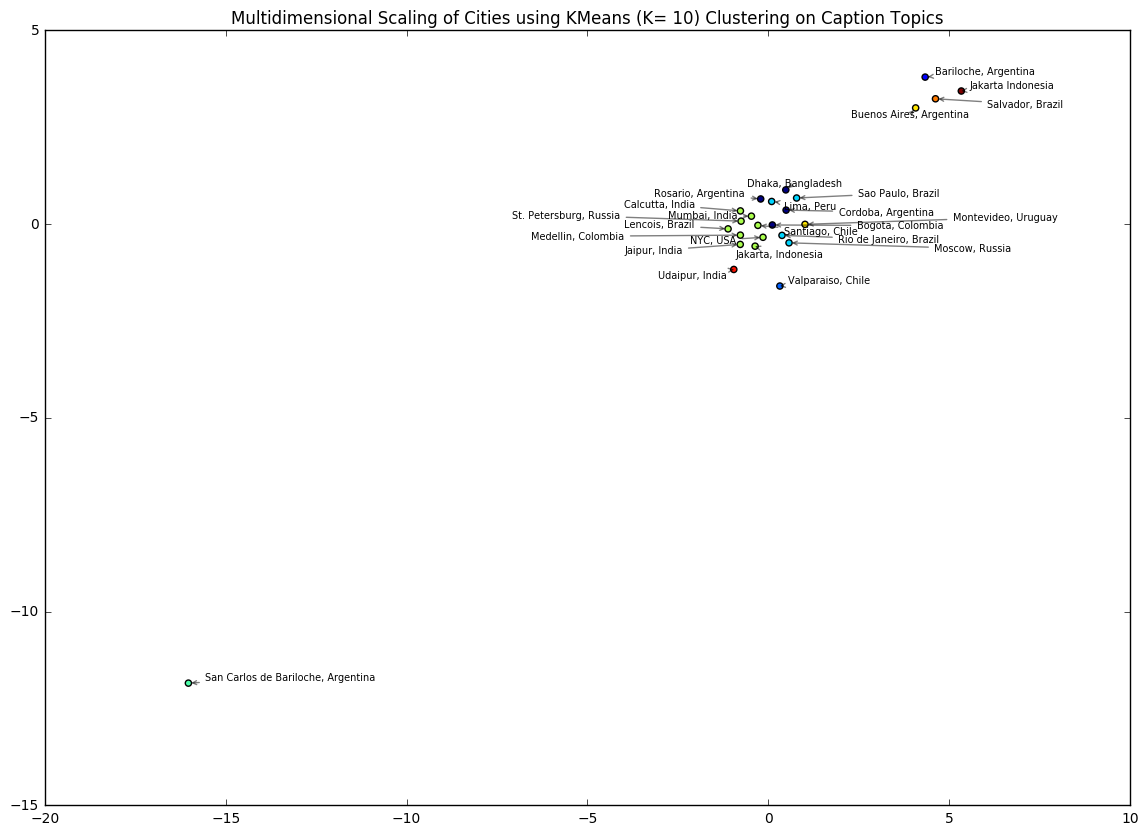

In [122]:
plt.rcParams['figure.figsize'] = (14,10)

dissimilarity = 1/cosine_df
dissimilarityarray = np.array(dissimilarity)

mds = manifold.MDS(dissimilarity="precomputed")
MDSResult = mds.fit(dissimilarityarray)
locations_ = MDSResult.embedding_

plt.scatter(locations_[:, 0],locations_[:, 1],c=km.labels_)

# labels = my_list

print labels

texts = []
for x, y, label in zip(locations_[:, 0],locations_[:, 1], labels):
    texts.append(plt.text(x, y, label, size=7))

adjust_text(texts, force_text=0.05, arrowprops=dict(arrowstyle="->",alpha=0.5))
plt.title('Multidimensional Scaling of Cities using KMeans (K= 10) Clustering on Caption Topics')

### Now with the Google Vision topics

   Cluster No.                                             Cities
0            0  [Bogota, Colombia, Cordoba, Argentina, Dhaka, ...
1            1                             [Bariloche, Argentina]
2            2                                [Valparaiso, Chile]
3            3  [Lima, Peru, Moscow, Russia, Rio de Janeiro, B...
4            4               [San Carlos de Bariloche, Argentina]
5            5  [Calcutta, India, Jaipur, India, Jakarta, Indo...
6            6     [Buenos Aires, Argentina, Montevideo, Uruguay]
7            7                                 [Salvador, Brazil]
8            8                                   [Udaipur, India]
9            9                                [Jakarta Indonesia]


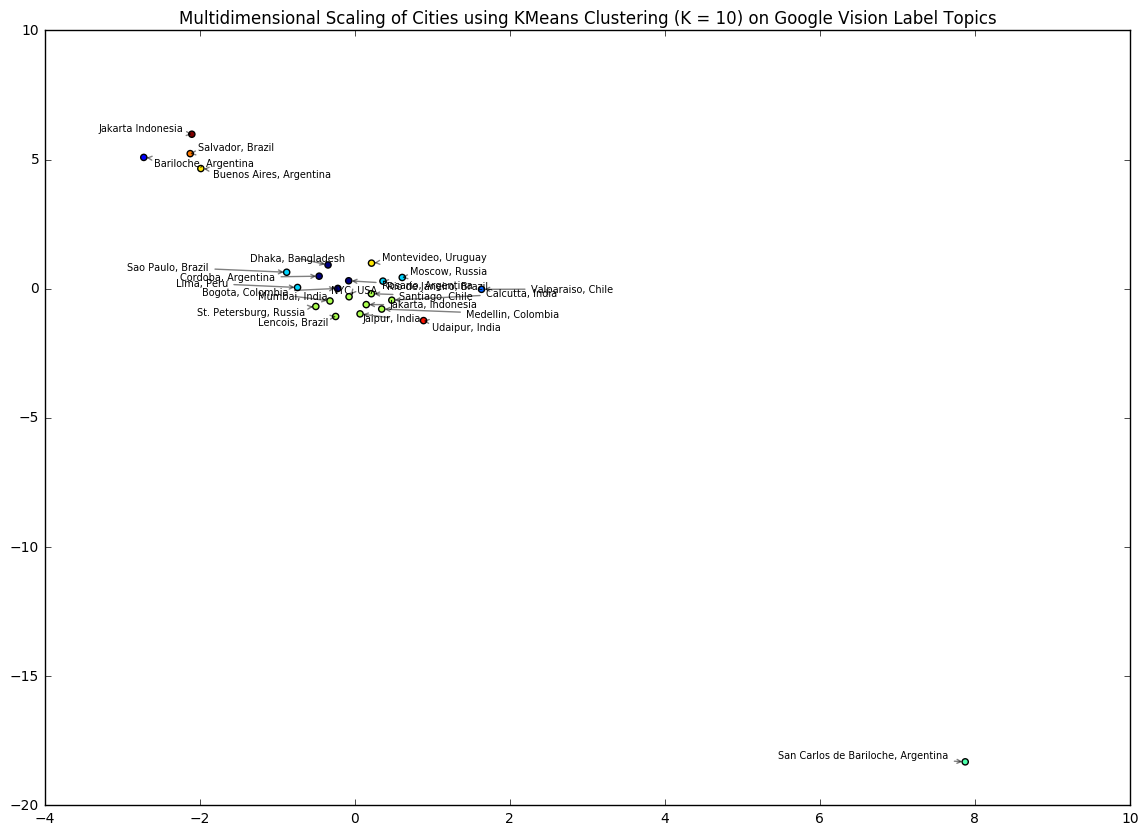

In [100]:
# Google Vision label topics

all_topics = G_lda.get_document_topics(G_corpus, per_word_topics = True)
i = 1
doc_topics_df = pd.DataFrame(columns = ['Post No.', 'Doc Topics'])
for doc_topics, word_topics, phi_values in all_topics:
    temp_df = pd.DataFrame([[i, doc_topics]], columns = ['Post No.', 'Doc Topics'])
    doc_topics_df = doc_topics_df.append(temp_df, ignore_index = True)
    i = i+1


doc_topics_df['Topics'] = doc_topics_df['Doc Topics'].map(get_topics)
doc_topics_df['Location'] = location_new
for j in range(0,20):
    doc_topics_df['Topic ' + str(j)] = doc_topics_df['Topics'].apply(lambda x: new_columns(str(j), x))

cities_df = doc_topics_df.loc[:,'Location':'Topic 14']

cities_counter = cities_df.groupby(['Location']).mean()
cities_counter = cities_counter.transpose()
cities_corr_df = cities_counter.corr()

cos_df = cities_df.groupby(['Location']).sum()
names = cos_df.reset_index()
temp = cos_df.T

cosine_df = pd.DataFrame(columns=names['Location'], index=names['Location'])

for city1, series in list(cosine_df.iterrows()):
    for city2 in series.index:
        if city1 != city2:
            cosine_df[city2].loc[city1] = temp[city1].dot(temp[city2]) / (m.sqrt((temp[city1]**2).sum())*m.sqrt((temp[city2]**2).sum()))

cosine_df = cosine_df.fillna(1)
cosine_df = cosine_df.replace(to_replace=0, value=0.01)

km = KMeans(n_clusters = 10)
km.fit(cosine_df)
clusters = km.labels_.tolist()

kmeansDF = pd.DataFrame(columns = ['Location','Cluster No.'])
kmeansDF['Location'] = sorted(set(location_new))
kmeansDF['Cluster No.'] = clusters
# kmeansDF

clusterDF = kmeansDF.groupby('Cluster No.')['Location'].agg(lambda x: list(x)).reset_index()
clusterDF.columns = [['Cluster No.','Cities']]
print clusterDF

labels = cosine_df.index.tolist()

plt.rcParams['figure.figsize'] = (14,10)

dissimilarity = 1/cosine_df
dissimilarityarray = np.array(dissimilarity)

mds = manifold.MDS(dissimilarity="precomputed")
MDSResult = mds.fit(dissimilarityarray)
locations_ = MDSResult.embedding_

plt.scatter(locations_[:, 0],locations_[:, 1],c=km.labels_)

texts = []
# for label, x, y in zip(labels, locations_[:, 0],locations_[:, 1]):
for x, y, label in zip(locations_[:, 0],locations_[:, 1], labels):
    texts.append(plt.text(x, y, label, size=7))
#     mdsplot.annotate(
#         label,
#         xy=(x, y), xytext=(-20, 20),
#         textcoords='offset points', ha='right', va='bottom',
#         bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
#         arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0'))

adjust_text(texts, force_text=0.05, arrowprops=dict(arrowstyle="->",alpha=0.5))
plt.title('Multidimensional Scaling of Cities using KMeans Clustering (K = 10) on Google Vision Label Topics')

In [112]:
import statsmodels.api as sm

In [84]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

In [111]:
X2 = doc_topics_df.loc[:,'Topic 0':'Topic 14']
y2 = df['likes']

# Create linear regression object and train with X and y
regr5 = linear_model.LinearRegression()
regr5.fit(X2, y2)

# The coefficients and MSE
print "Coefficients are:\n" , 1000*regr5.coef_
print "\nIntercept is:", 1000*regr5.intercept_
print "\nRMSE =", 1000*round(np.sqrt(mean_squared_error(y2, regr5.predict(X2))),3)

Coefficients are:
[ 70010.37677409 -10029.54934771  17458.91502359  44862.66442294
  -3534.59986121 -14569.86069279 -23271.32136033 -29999.08557704
 -68204.47920863  -7530.92957159  -5435.57551629  14356.49098141
 -23949.59307394 -22760.44862453  30276.2570827 ]

Intercept is: 206235.80249749267

RMSE = 97787.0


In [120]:
X3 = sm.add_constant(X2)
likes_model = sm.OLS(y2,X3).fit()
likes_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  likes   R-squared:                       0.088
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     3.739
Date:                Sun, 04 Mar 2018   Prob (F-statistic):           2.50e-06
Time:                        15:43:49   Log-Likelihood:                -3583.0
No. Observations:                 597   AIC:                             7198.
Df Residuals:                     581   BIC:                             7268.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        206.2358      6.737     30.613      0.000     193.004     219.467
Topic 0       70.0104     19.653      3.562      0.000      31.412     108.609
Topic 1      -10.0295     10.221     -0.981      0.327     -30.104      10.045
Topic 2       17.4589     18.189      0.960      0.338     -18.265      53.183
Topic 3       44.8627     20.545      2.184      0.029       4.511      85.214
Topic 4       -3.5346     14.204     -0.249      0.804     -31.432      24.363
Topic 5      -14.5699     10.038     -1.452      0.147     -34.284       5.144
Topic 6      -23.2713     19.825     -1.174      0.241     -62.209      15.667
Topic 7      -29.9991     14.718     -2.038      0.042     -58.906      -1.092
Topic 8      -68.2045     17.826     -3.826      0.000    -103.215     -33.194
Topic 9       -7.5309     11.932     -0.631      0.528     -30.966      15.905
Topic 10      -5.4356     19.727     -0.276      0.783     -44.180      33.309
Topic 11      14.3565     19.358      0.742      0.459     -23.664      52.377
Topic 12     -23.9496     12.823     -1.868      0.062     -49.135       1.235
Topic 13     -22.7604     18.273     -1.246      0.213     -58.649      13.128
Topic 14      30.2763     10.035      3.017      0.003      10.566      49.987
==============================================================================
Omnibus:                      332.051   Durbin-Watson:                   1.549
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3815.542
Skew:                           2.222   Prob(JB):                         0.00
Kurtosis:                      14.560   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [109]:
y3 = df['comments']

# Create linear regression object and train with X and y
regr6 = linear_model.LinearRegression()
regr6.fit(X2, y3)

# The coefficients and MSE
print "Coefficients are:\n" , regr6.coef_
print "\nIntercept is:", regr6.intercept_
print "\nRMSE =", round(np.sqrt(mean_squared_error(y3, regr6.predict(X2))),3)

Coefficients are:
[ -284.47082005  -502.65386121 -1044.08994039  1919.19060789
  -520.56179804  -424.84328152   767.80120222   181.8908045
 -1217.5715121    -54.13091575  -836.34598545   891.81004351
   579.02204676  -130.9764594    -99.93274766]

Intercept is: 3277.807551158856

RMSE = 3186.725


In [121]:
comments_model = sm.OLS(y3,X3).fit()
comments_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               comments   R-squared:                       0.042
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     1.715
Date:                Sun, 04 Mar 2018   Prob (F-statistic):             0.0441
Time:                        15:44:35   Log-Likelihood:                -5663.0
No. Observations:                 597   AIC:                         1.136e+04
Df Residuals:                     581   BIC:                         1.143e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3277.8076    219.541     14.930      0.000    2846.616    3708.999
Topic 0     -284.4708    640.446     -0.444      0.657   -1542.342     973.400
Topic 1     -502.6539    333.082     -1.509      0.132   -1156.845     151.538
Topic 2    -1044.0899    592.747     -1.761      0.079   -2208.279     120.099
Topic 3     1919.1906    669.531      2.866      0.004     604.195    3234.186
Topic 4     -520.5618    462.884     -1.125      0.261   -1429.692     388.569
Topic 5     -424.8433    327.108     -1.299      0.195   -1067.301     217.614
Topic 6      767.8012    646.071      1.188      0.235    -501.118    2036.720
Topic 7      181.8908    479.638      0.379      0.705    -760.144    1123.925
Topic 8    -1217.5715    580.906     -2.096      0.037   -2358.504     -76.639
Topic 9      -54.1309    388.850     -0.139      0.889    -817.855     709.593
Topic 10    -836.3460    642.868     -1.301      0.194   -2098.975     426.283
Topic 11     891.8100    630.855      1.414      0.158    -347.224    2130.844
Topic 12     579.0220    417.880      1.386      0.166    -241.717    1399.761
Topic 13    -130.9765    595.479     -0.220      0.826   -1300.530    1038.577
Topic 14     -99.9327    327.039     -0.306      0.760    -742.256     542.391
==============================================================================
Omnibus:                      741.945   Durbin-Watson:                   1.959
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           116821.692
Skew:                           5.955   Prob(JB):                         0.00
Kurtosis:                      70.487   Cond. No.                         10.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""